In [3]:
from pathlib import Path

from tira.rest_api_client import Client

if __name__ == "__main__":

    tira = Client()

    # loading train data
    text_train = tira.pd.inputs(
        "nlpbuw-fsu-sose-24", "authorship-verification-train-20240408-training"
    )
    targets_train = tira.pd.truths(
        "nlpbuw-fsu-sose-24", "authorship-verification-train-20240408-training"
    )
    # loading validation data (automatically replaced by test data when run on tira)
    text_validation = tira.pd.inputs(
        "nlpbuw-fsu-sose-24", "authorship-verification-validation-20240408-training"
    )
    targets_validation = tira.pd.truths(
        "nlpbuw-fsu-sose-24", "authorship-verification-validation-20240408-training"
    )

In [4]:
import pandas as pd

merged_train = pd.merge(text_train, targets_train, on='id')
merged_validation = pd.merge(text_validation, targets_validation, on='id')

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from transformers import BertTokenizer

tfidf_vectorizer = TfidfVectorizer(max_features=100)
x_train_tfidf = tfidf_vectorizer.fit_transform(merged_train['text']).toarray()
x_validation_tfidf = tfidf_vectorizer.fit_transform(merged_validation['text']).toarray()

count_vectorizer = CountVectorizer(max_features=100)
x_train_count = count_vectorizer.fit_transform(merged_train['text']).toarray()
x_validation_count = count_vectorizer.fit_transform(merged_validation['text']).toarray()

In [9]:
y_train = merged_train['generated']
y_validation = merged_validation['generated']

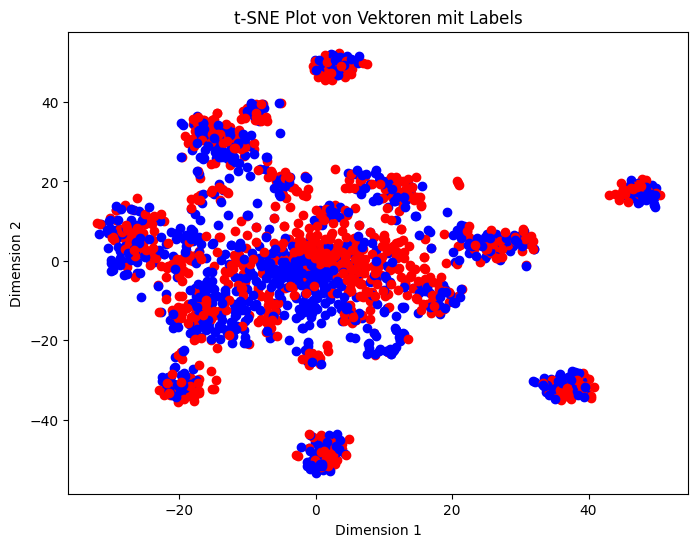

In [10]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Beispiel Daten (ersetze diese durch deine eigenen Daten)
vectors = x_train_tfidf
labels = y_train

# Reduziere die Dimensionen der Vektoren mit t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_embedded = tsne.fit_transform(vectors)

# Plotte die Vektoren
plt.figure(figsize=(8, 6))
for i in range(len(vectors_embedded)):
    if labels[i] == 0:
        plt.scatter(vectors_embedded[i, 0], vectors_embedded[i, 1], color='blue', label='0')
    else:
        plt.scatter(vectors_embedded[i, 0], vectors_embedded[i, 1], color='red', label='1')

plt.title('t-SNE Plot von Vektoren mit Labels')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

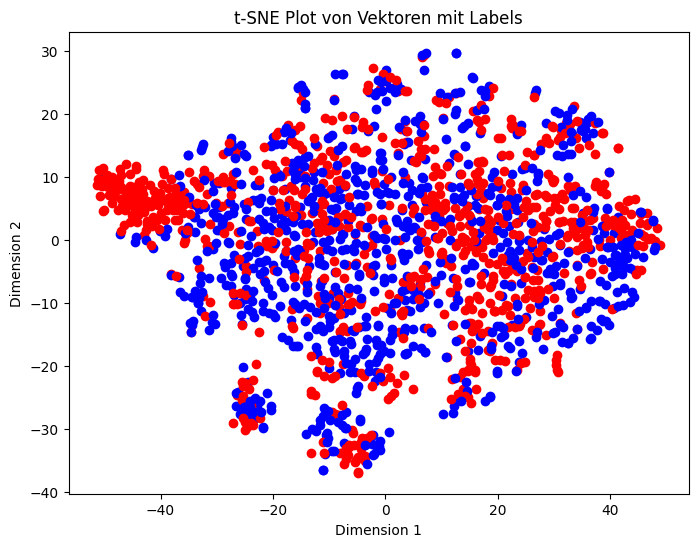

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Beispiel Daten (ersetze diese durch deine eigenen Daten)
vectors = x_train_count
labels = y_train

# Reduziere die Dimensionen der Vektoren mit t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_embedded = tsne.fit_transform(vectors)

# Plotte die Vektoren
plt.figure(figsize=(8, 6))
for i in range(len(vectors_embedded)):
    if labels[i] == 0:
        plt.scatter(vectors_embedded[i, 0], vectors_embedded[i, 1], color='blue', label='0')
    else:
        plt.scatter(vectors_embedded[i, 0], vectors_embedded[i, 1], color='red', label='1')

plt.title('t-SNE Plot von Vektoren mit Labels')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [12]:
from sklearn.metrics import f1_score, recall_score, precision_score

def acc(model, x, y, x_val, y_val):
    model.fit(x, y)
    pred = model.predict(x_val)
    acc = model.score(x_val, y_val)
    f1 = f1_score(y_val, pred)
    rec = recall_score(y_val, pred)
    prec = precision_score(y_val, pred)
    return acc, f1, rec, prec

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

acc_log_count, f1_log_count, recall_log_count, prec_log_count = acc(LogisticRegression(), x_train_count, y_train, x_validation_count, y_validation)
acc_log_tfidf, f1_log_tfidf, recall_log_tfidf, prec_log_tfidf = acc(LogisticRegression(), x_train_tfidf, y_train, x_validation_tfidf, y_validation)
acc_rf_count, f1_rf_count, recall_rf_count, prec_rf_count = acc(RandomForestClassifier(), x_train_count, y_train, x_validation_count, y_validation)
acc_rf_tfidf, f1_rf_tfidf, recall_rf_tfidf, prec_rf_tfidf = acc(RandomForestClassifier(), x_train_tfidf, y_train, x_validation_tfidf, y_validation)
acc_svm_count, f1_svm_count, recall_svm_count, prec_svm_count = acc(SVC(), x_train_count, y_train, x_validation_count, y_validation)
acc_svm_tfidf, f1_svm_tfidf, recall_svm_tfidf, prec_svm_tfidf = acc(SVC(), x_train_tfidf, y_train, x_validation_tfidf, y_validation)

print(acc_rf_count, f1_rf_count, recall_rf_count, prec_rf_count)
print(acc_rf_tfidf, f1_rf_tfidf, recall_rf_tfidf, prec_rf_tfidf)
print(acc_log_count, f1_log_count, recall_log_count, prec_log_count)
print(acc_log_tfidf, f1_log_tfidf, recall_log_tfidf, prec_log_tfidf)
print(acc_svm_count, f1_svm_count, recall_svm_count, prec_svm_count)
print(acc_svm_tfidf, f1_svm_tfidf, recall_svm_tfidf, prec_svm_tfidf)

/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.75 0.7572815533980582 0.78 0.7358490566037735
0.785 0.7962085308056872 0.84 0.7567567567567568
0.595 0.3305785123966942 0.2 0.9523809523809523
0.765 0.7614213197969543 0.75 0.7731958762886598
0.59 0.7071428571428572 0.99 0.55
0.615 0.72 0.99 0.5657142857142857


In [14]:
from sklearn.ensemble import RandomForestClassifier

acc_rf_tfidf, f1_rf_tfidf, recall_rf_tfidf, prec_rf_tfidf = acc(RandomForestClassifier(), x_train_bert, y_train, x_validation_bert, y_validation)

ValueError: could not convert string to float: 'input_ids'